<a href="https://colab.research.google.com/github/rajn5181/AI-and-NN/blob/main/Black_friday_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
del df['Product_Category_2']
del df['Product_Category_3']

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
df['User_ID'].nunique()

5891

In [13]:
df['Product_ID'].nunique()

3623

In [14]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [18]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Marital_Status'].unique()

array([0, 1])

In [21]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [22]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ..., 14539, 11120, 18426])

In [25]:
for column in df.columns:
  print(column,df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


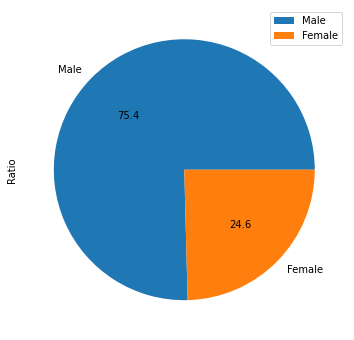

In [33]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data.plot.pie(y='Ratio',figsize=(6,6),autopct="%.1f")

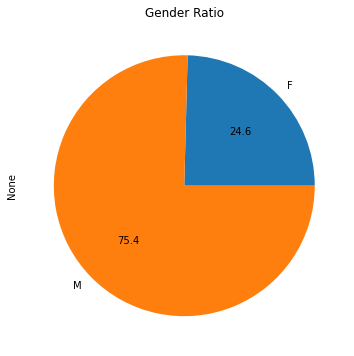

In [35]:
df.groupby('Gender').size().plot(kind='pie',autopct="%.1f",title='Gender Ratio',figsize=(6,6))

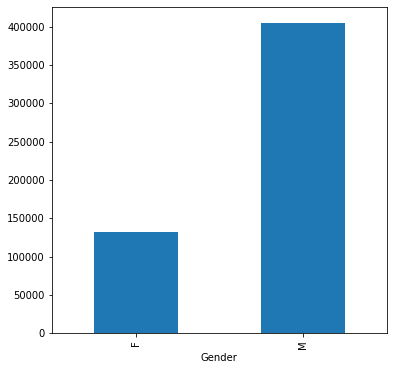

In [37]:
df.groupby('Gender').size().plot(kind='bar',figsize=(6,6))

In [38]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

In [40]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

**Analysing age and marital status**


In [41]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

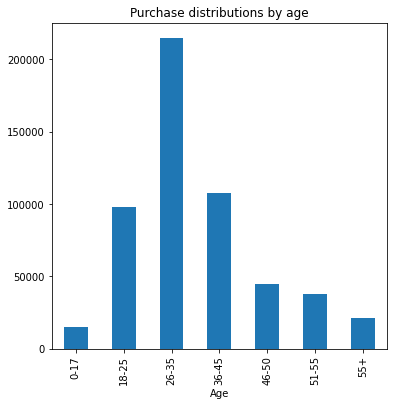

In [43]:
df.groupby('Age').size().plot(kind='bar',figsize=(6,6),title="Purchase distributions by age")

In [47]:
for i in df['Age'].unique():
  print(i,':',len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [51]:
df[df['Age']==i]['Product_ID'].nunique()

3213

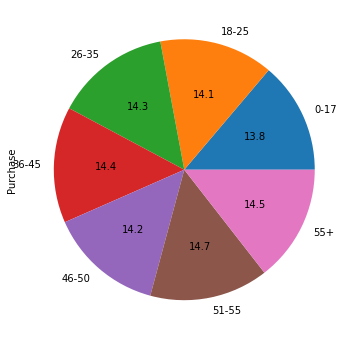

In [55]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(6,6))

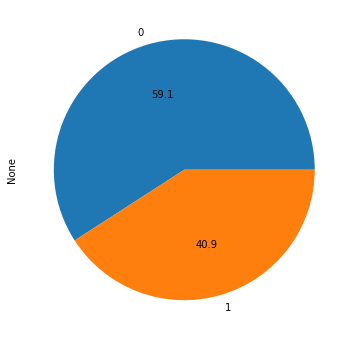

In [57]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f',figsize=(6,6))

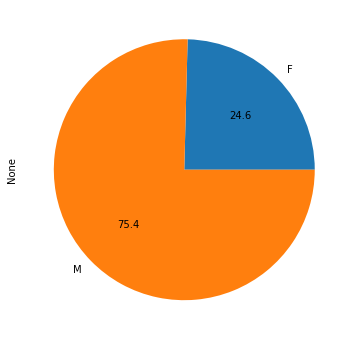

In [58]:
df.groupby('Gender').size().plot(kind='pie',autopct='%0.1f',figsize=(6,6))

**Occupations and product analysis**

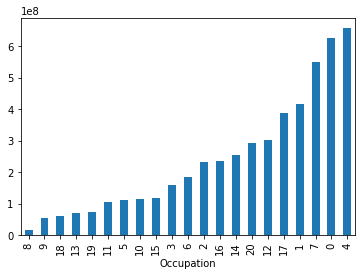

In [60]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

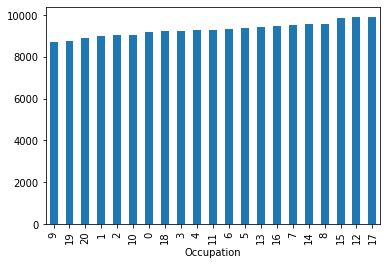

In [61]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')

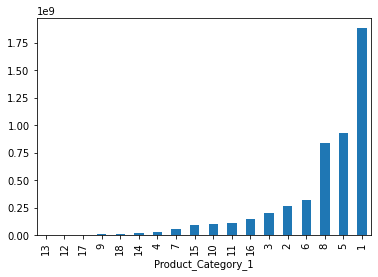

In [62]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

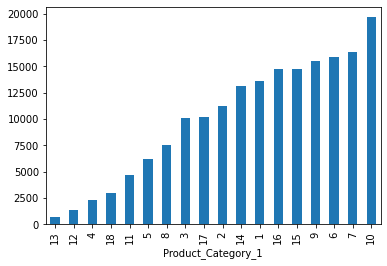

In [64]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

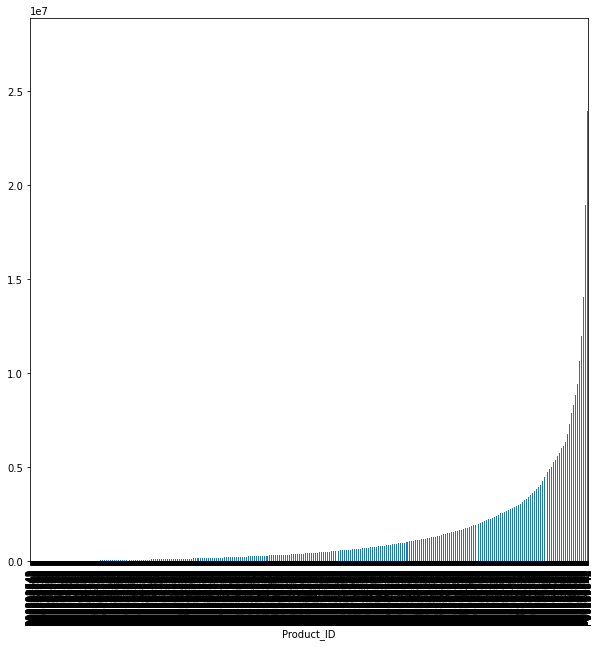

In [68]:
df.groupby('Product_ID').sum()['Purchase'].sort_values().plot(kind='bar',figsize=(10,10))

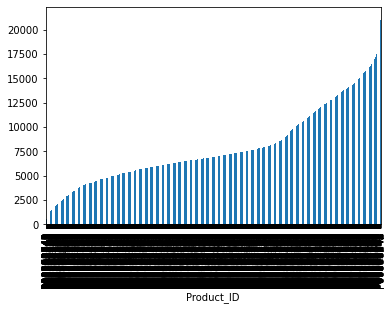

In [67]:
df.groupby('Product_ID').mean()['Purchase'].sort_values().plot(kind='bar')